<a href="https://colab.research.google.com/github/radhikabandi/ModelViewControllerTechBlog/blob/main/NLP_Project_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with analyzing the data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Please read the instructions carefully before starting the project.**

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

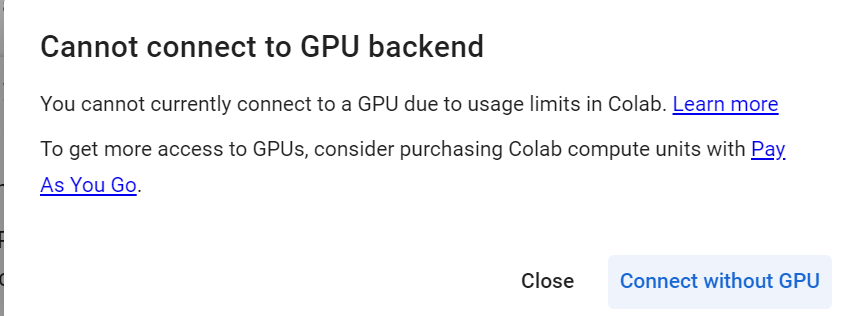

## **Installing and Importing Necessary Libraries**

In [1]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers gensim transformers tqdm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.6 MB/s eta 0:00:00


In [3]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers gensim transformers tqdm -q
!pip install --upgrade scikit-learn

# To manipulate and analyze data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# To used time-related functions
import time

# To parse JSON data
import json

# To build, tune, and evaluate ML models
# The following line was causing the error,
#it seems the DecisionTreeClassifier class is not found in the module you are trying to import it from.
# To fix it, ensure that you have scikit-learn v0.22 or higher installed, or correct the name of the class if it is different.
# You likely want to import the class directly from "sklearn.tree"
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# To load/create word embeddings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')
#from sklearn.ensemble import DecisionTreeClassifier # This line is redundant, remove it

## **Loading the dataset**

In [4]:
# ## **Loading the dataset**
stock_news = pd.read_csv("/content/sample_data/stock_news.csv") # Replace with your actual file path

In [5]:
stock = stock_news.copy()

## **Data Overview**

In [6]:
stock.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


In [7]:
# the shape of the data

stock.shape

(349, 8)

In [8]:
# check the data types

stock.dtypes

,0
Date,object
News,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Label,int64


In [9]:
#to convert the 'Date' column in the 'stock' DataFrame to datetime format.

stock['Date'] = pd.to_datetime(stock['Date'])

In [10]:
# Complete the code to check the statistical summary

stock.describe()

,Date,Open,High,Low,Close,Volume,Label
count,349,349.000000,349.000000,349.000000,349.000000,3.490000e+02,349.000000
mean,2019-02-16 16:05:30.085959936,46.229233,46.700458,45.745394,44.926317,1.289482e+08,-0.054441
min,2019-01-02 00:00:00,37.567501,37.817501,37.305000,36.254131,4.544800e+07,-1.000000
25%,2019-01-14 00:00:00,41.740002,42.244999,41.482498,40.246914,1.032720e+08,-1.000000
50%,2019-02-05 00:00:00,45.974998,46.025002,45.639999,44.596924,1.156272e+08,0.000000
75%,2019-03-22 00:00:00,50.707500,50.849998,49.777500,49.110790,1.511252e+08,0.000000
max,2019-04-30 00:00:00,66.817497,67.062500,65.862503,64.805229,2.444392e+08,1.000000
std,NaN,6.442817,6.507321,6.391976,6.398338,4.317031e+07,0.715119


In [11]:
# code to check the duplicate values

stock.duplicated().sum()

0

In [12]:
#  check for missing values in the data

stock.isnull().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


## **Exploratory Data Analysis**

Univariate Analysis

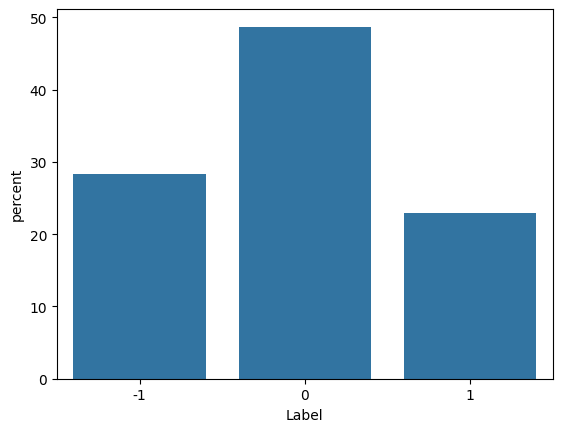

In [13]:
sns.countplot(data=stock, x="Label", stat="percent")
plt.show()

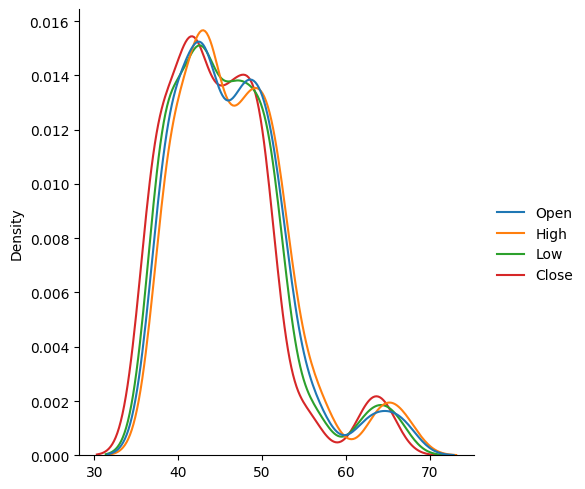

In [14]:
sns.displot(data=stock[["Open","High","Low","Close"]], kind="kde", palette="tab10");

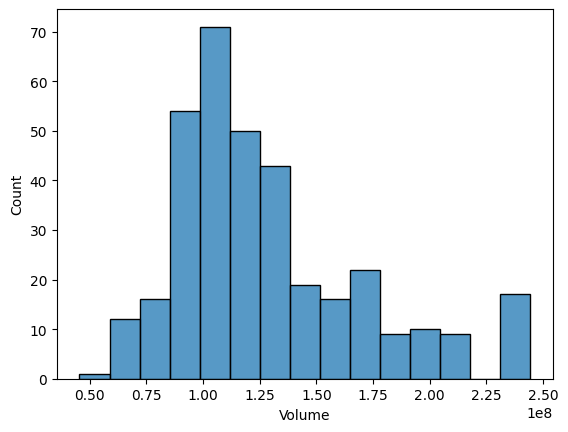

In [15]:
# plot a histogram of Volume

sns.histplot(stock, x='Volume');

In [16]:
# Calculating the total number of words present in the news content.
stock['news_len'] = stock['News'].apply(lambda x: len(x.split(' ')))
stock['news_len'].describe()


,news_len
count,349.000000
mean,49.312321
std,5.727770
min,19.000000
25%,46.000000
50%,50.000000
75%,53.000000
max,61.000000


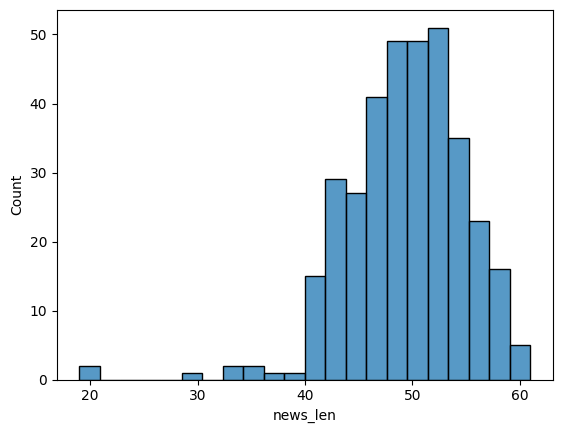

In [17]:
# plot a histogram of news_len column

sns.histplot(data=stock,x="news_len");

### Bivariate Analysis

* Correlation
* Sentiment Polarity vs Price
* Date vs Price

**Note**: The above points are listed to provide guidance on how to approach bivariate analysis. Analysis has to be done beyond the above listed points to get maximum scores.

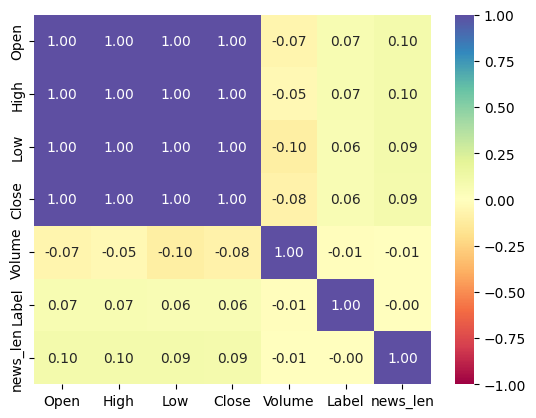

In [18]:
# the correlation matrix for numeric columns only.

sns.heatmap(
    stock[stock.select_dtypes(include=np.number).columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
);

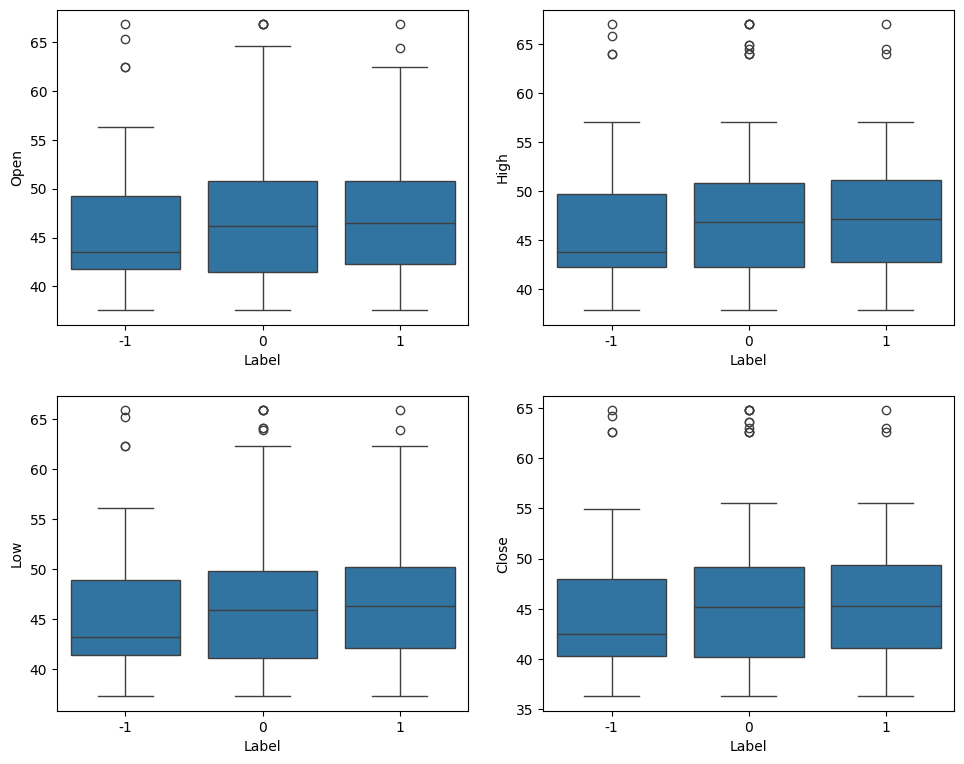

In [19]:
plt.figure(figsize=(10, 8))
for i, variable in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=stock, x="Label", y=variable)
    plt.tight_layout(pad=2)
plt.show()

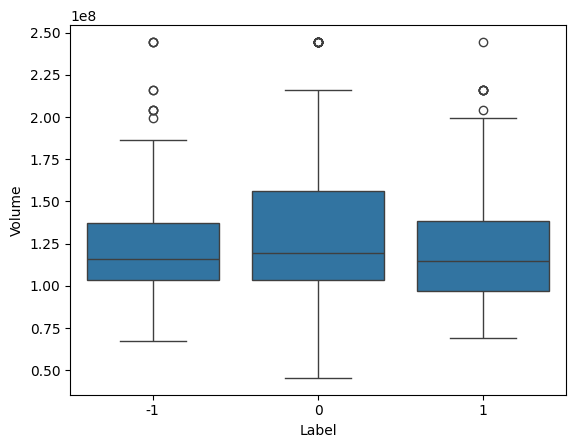

In [20]:
sns.boxplot(
    data=stock, x="Label", y="Volume"  # Complete the code to plot a boxplot of Label vs Volume
);

In [21]:
stock_daily = stock.groupby('Date').agg(
    {
        'Open': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Close': 'mean',
        'Volume': 'mean',
    }
).reset_index()
stock_daily.set_index('Date', inplace=True)
print(stock_daily.head())

                 Open       High        Low      Close       Volume
Date                                                               
2019-01-02  41.740002  42.244999  41.482498  40.246914  130672400.0
2019-01-03  43.570000  43.787498  43.222500  42.470604  103544800.0
2019-01-04  47.910000  47.919998  47.095001  46.419842  111448000.0
2019-01-07  50.792500  51.122501  50.162498  49.110790  109012000.0
2019-01-08  53.474998  54.507500  51.685001  50.787209  216071600.0


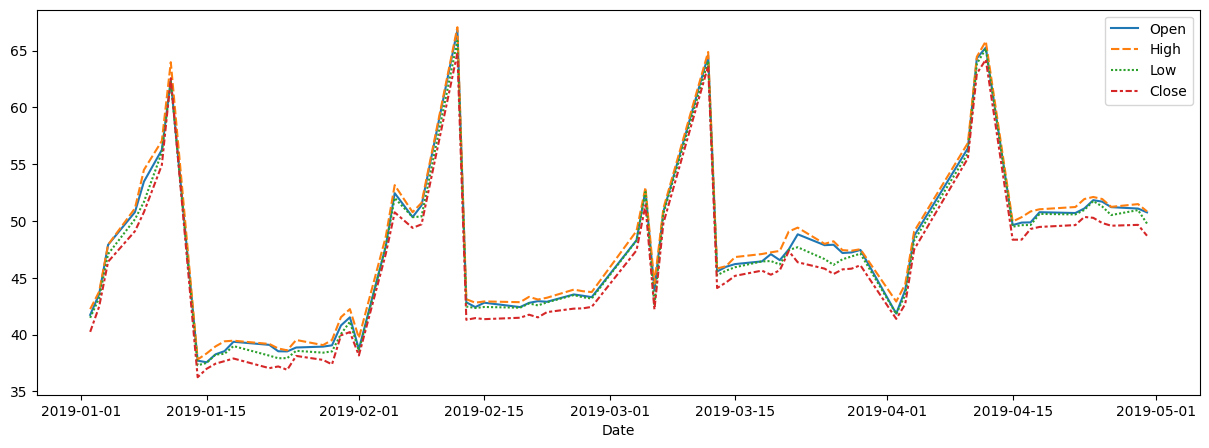

In [22]:

plt.figure(figsize=(15,5))
sns.lineplot(stock_daily.drop("Volume", axis=1));

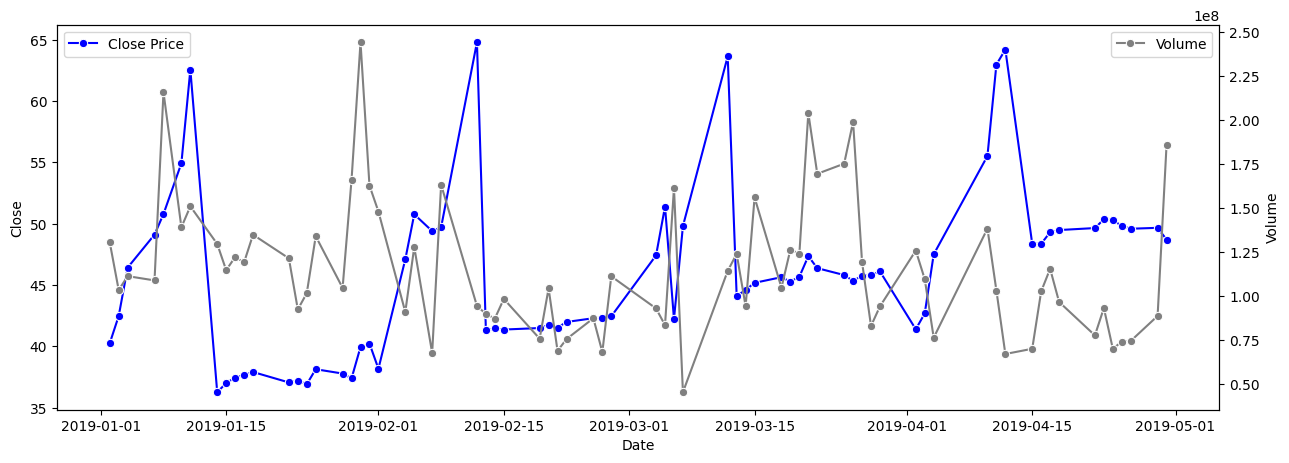

In [23]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15,5))

# Lineplot on primary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Close', ax=ax1, color='blue', marker='o', label='Close Price')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Lineplot on secondary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Volume', ax=ax2, color='gray', marker='o', label='Volume')

# Adjust legend position to avoid overlapping with the plot
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

## **Data Preprocessing**

In [24]:
stock["Date"].describe()

,Date
count,349
mean,2019-02-16 16:05:30.085959936
min,2019-01-02 00:00:00
25%,2019-01-14 00:00:00
50%,2019-02-05 00:00:00
75%,2019-03-22 00:00:00
max,2019-04-30 00:00:00


In [25]:
X_train = stock[(stock['Date'] < '2019-04-01')].reset_index()    #Complete the code to select all rows where the 'Date' is before '2019-04-01'
X_val = stock[(stock['Date'] >= '2019-04-01') & (stock['Date'] < '2019-04-16')].reset_index()    #Complete the code to select all rows where the 'Date' is from '2019-04-01 to '2019-04-16' (excluded)
X_test = stock[stock['Date'] >= '2019-04-16'].reset_index()    #Complete the code to select all rows where the 'Date' is from '2019-04-16' till the end.

In [26]:
# Complete the code to pick the 'Label' column as the target variable
y_train = X_train["Label"].copy()
y_val = X_val["Label"].copy()
y_test = X_test["Label"].copy()

In [27]:
print("Train data shape",X_train.shape)
print("Validation data shape",X_val.shape)
print("Test data shape ",X_test.shape)
print("Train label shape",y_train.shape)
print("Validation label shape",y_val.shape)
print("Test label shape ",y_test.shape)

Train data shape (286, 10)
Validation data shape (21, 10)
Test data shape  (42, 10)
Train label shape (286,)
Validation label shape (21,)
Test label shape  (42,)


## **Word Embeddings**

In [28]:
words_list = [item.split(" ") for item in stock['News'].values]

In [29]:
!pip install gensim
from gensim.models import Word2Vec

# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size=vec_size, min_count=1, window=5, workers=6)

In [30]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(model_W2V.wv.key_to_index))

Length of the vocabulary is 4682


In [31]:
# Checking the word embedding of a random word
word = "stock"
model_W2V.wv[word]

array([ 0.00280227,  0.0444718 ,  0.00503635,  0.02428509, -0.00272222,
       -0.0509747 ,  0.03532432,  0.08458629,  0.0097785 , -0.01572424,
        0.0113347 , -0.02216501,  0.00167408,  0.01202133, -0.02963607,
       -0.02557491,  0.02054396, -0.01261816, -0.00225046, -0.01357025,
       -0.02643857,  0.00257873,  0.03717381,  0.00735102,  0.01483408,
        0.00596508, -0.04394801,  0.00654113, -0.01859542, -0.03538293,
        0.01382212, -0.02146784,  0.00362384, -0.00281779, -0.00434858,
        0.0170196 ,  0.01712617, -0.03831534,  0.00215025, -0.01040234,
       -0.01633212, -0.00176258, -0.00161073, -0.02671156,  0.01601708,
        0.04028393,  0.00040173,  0.01067314, -0.00168467,  0.02734821,
        0.02028238,  0.00543904, -0.01648019,  0.01318395, -0.01059646,
        0.02795126,  0.01352674,  0.00360419,  0.01592309, -0.00464072,
       -0.00630598, -0.01618738, -0.00040507,  0.01081023,  0.00711864,
        0.01444176,  0.00187973,  0.0147677 , -0.02280167, -0.00

In [32]:
word = "economy"
if word in model_W2V.wv:
    print(model_W2V.wv[word])
else:
    print(f"Word '{word}' not found in the vocabulary.")

[ 2.35339627e-03  6.40802132e-03 -6.74224502e-05  3.56171094e-03
 -2.38339906e-03 -8.56154691e-03  8.50084145e-03  1.55296344e-02
  4.29568172e-04 -1.42947084e-03  2.39515561e-03 -4.49318672e-03
  8.01424903e-04  1.99274300e-03 -4.86248359e-03 -3.30532691e-03
  2.16553384e-03 -3.32496827e-03 -6.20277599e-04 -3.86857591e-03
 -1.10462517e-03  1.63064466e-03  5.12115145e-03  2.27348646e-03
  4.56709275e-03  1.57902844e-03 -4.44126362e-03 -1.32844038e-03
 -2.49283249e-03 -5.63629810e-03  2.93266494e-03 -2.00946140e-03
  3.18506127e-03 -1.69234991e-03  2.53185048e-04  3.55054252e-03
  1.43965823e-03 -2.90989853e-03  6.05705194e-04 -1.75483979e-03
 -4.71841311e-03  5.01640956e-04  1.37078564e-03 -5.20581426e-03
 -1.06746005e-03  6.75729150e-03 -1.62337092e-03  5.02133602e-03
 -2.80169514e-03  5.84088732e-03  6.61645317e-04 -1.04529106e-04
 -2.26642797e-03  1.20879128e-03 -2.66163028e-03  5.35701215e-03
  5.62678510e-03  2.76539056e-03  1.80784648e-03 -3.07064597e-03
 -2.54313811e-03  9.81366

In [33]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())
# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()
# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

In [34]:
import numpy as np

def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")
    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]
    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])
    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)
    return feature_vector

In [35]:
!pip install tqdm

import pandas as pd
from tqdm import tqdm

def apply_with_progress(df, func, desc):
    """Applies a function to a DataFrame with a progress bar."""
    tqdm.pandas(desc=desc) # Applies tqdm to pandas operations
    return df.progress_apply(func)

# creating a dataframe of the vectorized documents
start = time.time()

# Applying average_vectorizer_Word2Vec with progress bar
X_train_wv = pd.DataFrame(apply_with_progress(X_train["News"], average_vectorizer_Word2Vec, "Vectorizing X_train").tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_wv = pd.DataFrame(apply_with_progress(X_val["News"], average_vectorizer_Word2Vec, "Vectorizing X_val").tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_wv = pd.DataFrame(apply_with_progress(X_test["News"], average_vectorizer_Word2Vec, "Vectorizing X_test").tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Vectorizing X_test: 100%|██████████| 42/42 [00:00<00:00, 166.54it/s]

Time taken  3.55604887008667


In [36]:
print(X_train_wv.shape, X_val_wv.shape, X_test_wv.shape)

(286, 300) (21, 300) (42, 300)


In [37]:

from gensim.models import KeyedVectors

filename = '/content/sample_data/glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [38]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


In [39]:
# Checking the word embedding of a random word
word = "stock"
if word in glove_model:
    print(glove_model[word])
else:
    print(f"Word '{word}' not found in the vocabulary.")

[ 8.6341e-01  6.9648e-01  4.5794e-02 -9.5708e-03 -2.5498e-01 -7.4666e-01
 -2.2086e-01 -4.4615e-01 -1.0423e-01 -9.9931e-01  7.2550e-02  4.5049e-01
 -5.9912e-02 -5.7837e-01 -4.6540e-01  4.3429e-02 -5.0570e-01 -1.5442e-01
  9.8250e-01 -8.1571e-02  2.6523e-01 -2.3734e-01  9.7675e-02  5.8588e-01
 -1.2948e-01 -6.8956e-01 -1.2811e-01 -5.2265e-02 -6.7719e-01  3.0190e-02
  1.8058e-01  8.6121e-01 -8.3206e-01 -5.6887e-02 -2.9578e-01  4.7180e-01
  1.2811e+00 -2.5228e-01  4.9557e-02 -7.2455e-01  6.6758e-01 -1.1091e+00
 -2.0493e-01 -5.8669e-01 -2.5375e-03  8.2777e-01 -4.9102e-01 -2.6475e-01
  4.3015e-01 -2.0516e+00 -3.3208e-01  5.1845e-02  5.2646e-01  8.7452e-01
 -9.0237e-01 -1.7366e+00 -3.4727e-01  1.6590e-01  2.7727e+00  6.5756e-02
 -4.0363e-01  3.8252e-01 -3.0787e-01  5.9202e-01  1.3468e-01 -3.3851e-01
  3.3646e-01  2.0950e-01  8.5905e-01  5.1865e-01 -1.0657e+00 -2.6371e-02
 -3.1349e-01  2.3231e-01 -7.0192e-01 -5.5737e-01 -2.3418e-01  1.3563e-01
 -1.0016e+00 -1.4221e-01  1.0372e+00  3.5880e-01 -4

In [40]:
word = "economy"
if word in glove_model:
    print(glove_model[word])
else:
    print(f"Word '{word}' not found in the vocabulary.")

[-0.19382    1.017      1.076      0.02954   -0.39192   -1.3891
 -0.87873   -0.63162    0.9643    -0.43035   -0.34868    0.22736
 -0.40296    0.15641   -0.16813   -0.15343   -0.15799   -0.27612
  0.18088   -0.28386    0.49847    0.29864    0.32353    0.18108
 -0.59623   -0.54165   -0.70019   -0.64956   -0.69063    0.18084
 -0.38581    0.56086   -0.40313   -0.38777   -0.70615    0.20657
  0.34171   -0.23393   -0.35882   -0.2201    -0.76182   -1.2047
  0.4339     1.1656     0.1836    -0.21601    0.93198   -0.059616
 -0.11624   -1.3259    -0.79772   -0.0074957 -0.0889     1.4749
  0.31157   -2.2952    -0.058351   0.39353    1.4983     0.74023
 -0.20109    0.098124  -0.73081   -0.32294    0.16703    0.87431
 -0.041624  -0.51022    1.0737    -0.4257     1.0581     0.19859
 -0.60087   -0.33906    0.60243   -0.091581  -0.47201    0.74933
 -0.60168   -0.44178    0.77391    0.81114   -1.2889     0.32055
 -0.36117   -0.88078    0.055524  -0.26837   -0.33688   -1.4359
  0.85666    0.32025   -0.15

In [41]:
# Retrieving the words present in the GloVe model's vocabulary
glove_words = glove_model.index_to_key
# Creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = dict(zip(glove_model.index_to_key, list(glove_model.vectors)))

In [ ]:
vec_size = 100

In [44]:
vec_size = 300 # global variable vec_size was overwritten and set to 100. Original value is 300

def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64") # vec_size is now 300
    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]
    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])
    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)
    return feature_vector

In [53]:
import numpy as np
import pandas as pd
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
import os

def load_glove_vectors(glove_path, convert_to_w2v=True):
    """
    Load GloVe vectors and convert them to word2vec format if needed.

    Args:
        glove_path (str): Path to the GloVe vector file
        convert_to_w2v (bool): Whether to convert from GloVe to word2vec format

    Returns:
        KeyedVectors: Loaded word vectors
    """
    # If we need to convert the format
    if convert_to_w2v:
        # Create temporary file for word2vec format
        w2v_path = glove_path + '.word2vec'

        # Convert if the converted file doesn't exist
        if not os.path.exists(w2v_path):
            glove2word2vec(glove_path, w2v_path)

        # Load the converted vectors
        model = KeyedVectors.load_word2vec_format(w2v_path, binary=False)
    else:
        # Load GloVe vectors directly (only if they're already in word2vec format)
        model = KeyedVectors.load_word2vec_format(glove_path, binary=False)

    return model

def create_word_vector_dict(model):
    """
    Create a dictionary of words and their vectors from the model.

    Args:
        model (KeyedVectors): Loaded word vectors

    Returns:
        dict: Dictionary mapping words to their vectors
    """
    return dict(zip(model.index_to_key, model.vectors))

def average_vectorizer(doc, word_vectors, vector_size):
    """
    Convert a document to its average vector representation.

    Args:
        doc (str): Input document text
        word_vectors (dict): Dictionary of word vectors
        vector_size (int): Size of word vectors

    Returns:
        np.array: Average vector for the document
    """
    # Initialize zero vector
    feature_vector = np.zeros((vector_size,), dtype="float64")

    # Split document into words
    words = doc.split()

    # Get vectors for words that exist in our vocabulary
    word_vectors_list = [word_vectors[word] for word in words if word in word_vectors]

    if word_vectors_list:
        # Calculate average vector
        feature_vector = np.mean(word_vectors_list, axis=0)

    return feature_vector

# Example usage
def main():
    # Path to your GloVe file
    glove_path = '/content/sample_data/glove.6B.100d.txt'  # Remove .word2vec extension

    # Load vectors
    print("Loading GloVe vectors...")
    glove_model = load_glove_vectors(glove_path)

    # Create word vector dictionary
    print("Creating word vector dictionary...")
    word_vectors = create_word_vector_dict(glove_model)

    # Get vector size
    vector_size = glove_model.vector_size

    # Vectorize documents
    print("Vectorizing documents...")
    X_train_gl = pd.DataFrame(
        X_train["News"].apply(
            lambda x: average_vectorizer(x, word_vectors, vector_size)
        ).tolist(),
        columns=[f'Feature_{i}' for i in range(vector_size)]
    )

    X_val_gl = pd.DataFrame(
        X_val["News"].apply(
            lambda x: average_vectorizer(x, word_vectors, vector_size)
        ).tolist(),
        columns=[f'Feature_{i}' for i in range(vector_size)]
    )

    X_test_gl = pd.DataFrame(
        X_test["News"].apply(
            lambda x: average_vectorizer(x, word_vectors, vector_size)
        ).tolist(),
        columns=[f'Feature_{i}' for i in range(vector_size)]
    )

    return X_train_gl, X_val_gl, X_test_gl

if __name__ == "__main__":
    main()

Loading GloVe vectors...
Creating word vector dictionary...
Vectorizing documents...


In [56]:
X_train_gl, X_val_gl, X_test_gl = main()
print(X_train_gl.shape, X_val_gl.shape, X_test_gl.shape)

Loading GloVe vectors...
Creating word vector dictionary...
Vectorizing documents...
(286, 100) (21, 100) (42, 100)


In [57]:
!pip install sentence_transformers  # Installing the required library
from sentence_transformers import SentenceTransformer # Importing the SentenceTransformer class

#Defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [58]:
!pip install torch #Install torch
import torch #Importing torch module

# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [59]:
# encoding the dataset
start = time.time()
X_train_st = model.encode(X_train["News"].values, show_progress_bar=True, device=device) #Complete the code to apply Sentence Transformer on 'News' column
X_val_st = model.encode(X_val["News"].values, show_progress_bar=True, device=device) #Complete the code to apply Sentence Transformer on 'News' column
X_test_st = model.encode(X_test["News"].values, show_progress_bar=True, device=device) #Complete the code to apply Sentence Transformer on 'News' column
end = time.time()
print("Time taken ",(end-start))

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Time taken  48.74156856536865


In [60]:
print(X_train_st.shape, X_val_st.shape, X_test_st.shape)

(286, 384) (21, 384) (42, 384)


## **Sentiment Analysis**

In [61]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(model, predictors, target):
    """
    Plot a confusion matrix to visualize the performance of a classification model.
    Parameters:
    actual (array-like): The true labels.
    predicted (array-like): The predicted labels from the model.
    Returns:
    None: Displays the confusion matrix plot.
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.
    cm = confusion_matrix(target, pred)  # Compute the confusion matrix.
    plt.figure(figsize=(5, 4))  # Create a new figure with a specified size.
    label_list = [0, 1,-1]  # Define the labels for the confusion matrix.
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
    # Plot the confusion matrix using a heatmap with annotations.
    plt.ylabel('Actual')  # Label for the y-axis.
    plt.xlabel('Predicted')  # Label for the x-axis.
    plt.title('Confusion Matrix')  # Title of the plot.
    plt.show()  # Display

In [62]:
def model_performance_classification_sklearn(model, predictors, target):
    """
     Compute various performance metrics for a classification model using sklearn.
     Parameters:
     model (sklearn classifier): The classification model to evaluate.
     predictors (array-like): The independent variables used for predictions.
     target (array-like): The true labels for the dependent variable.
     Returns:
     pandas.DataFrame: A DataFrame containing the computed metrics (Accuracy, Recall, Precision, F1-score).
     """
     # Import necessary functions from sklearn.metrics
    from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

    pred = model.predict(predictors)  # Make predictions using the classifier.
    acc = accuracy_score(target, pred)  # Compute Accuracy.
    recall = recall_score(target, pred,average='weighted')  # Compute Recall.
    precision = precision_score(target, pred,average='weighted')  # Compute Precision.
    f1 = f1_score(target, pred,average='weighted')  # Compute F1-score.
    # Create a DataFrame to store the computed metrics.
    df_perf = pd.DataFrame(
        {

            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1,
        },
        index=[0],
    )
    return df_perf

In [63]:
# Import the necessary class from scikit-learn
from sklearn.ensemble import GradientBoostingClassifier

# Building the model
base_wv = GradientBoostingClassifier(random_state=42)
# Fitting on train data
base_wv.fit(X_train_wv, y_train)

GradientBoostingClassifier(random_state=42)

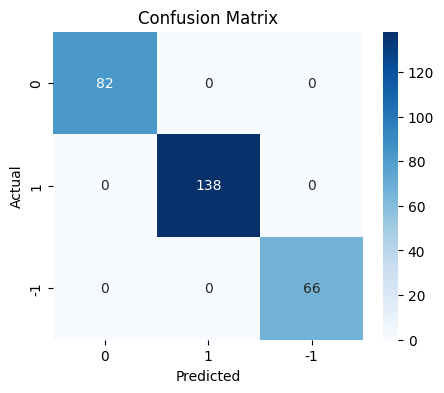

In [64]:
plot_confusion_matrix(base_wv,X_train_wv,y_train)

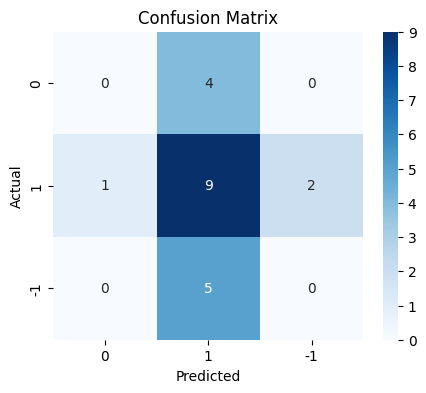

In [65]:
plot_confusion_matrix(base_wv,X_val_wv,y_val)

In [66]:
#Calculating different metrics on training data
base_train_wv = model_performance_classification_sklearn(base_wv,X_train_wv,y_train)
print("Training performance:\n", base_train_wv)

Training performance:
    Accuracy  Recall  Precision  F1-score
0       1.0     1.0        1.0       1.0


In [67]:
#Calculating different metrics on validation data
base_val_wv = model_performance_classification_sklearn(base_wv,X_val_wv,y_val)
print("Validation performance:\n",base_val_wv)

Validation performance:
    Accuracy    Recall  Precision  F1-score
0  0.428571  0.428571   0.285714  0.342857


In [68]:
# Building the model
base_wv = GradientBoostingClassifier(random_state = 42)

# Fitting on train data
base_wv.fit(X_train_gl, y_train)

GradientBoostingClassifier(random_state=42)

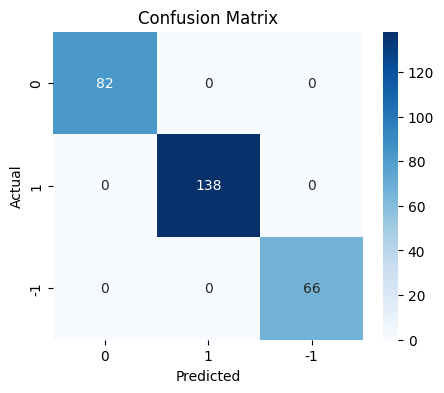

In [69]:

plot_confusion_matrix(base_wv, X_train_gl, y_train)

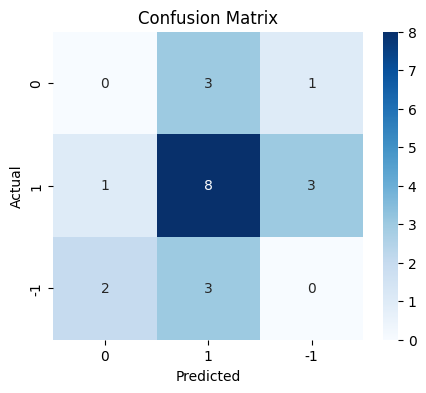

In [70]:
plot_confusion_matrix(base_wv, X_val_gl, y_val)

In [71]:
base_train_gl = model_performance_classification_sklearn(base_wv, X_train_gl, y_train)

In [72]:
base_val_gl = model_performance_classification_sklearn(base_wv, X_val_gl, y_val)

In [73]:
!pip install scikit-learn
# Import the necessary module
from sklearn.tree import DecisionTreeClassifier

# Create a new instance of the DecisionTreeClassifier
# consider using a different variable name to avoid confusion with previous usage of base_wv
tree_classifier = DecisionTreeClassifier(random_state=42)
# Fitting on train data
tree_classifier.fit(X_train_st, y_train)

DecisionTreeClassifier(random_state=42)

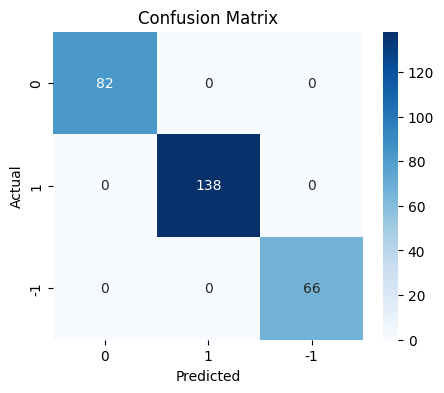

In [74]:
plot_confusion_matrix(tree_classifier,X_train_st,y_train)

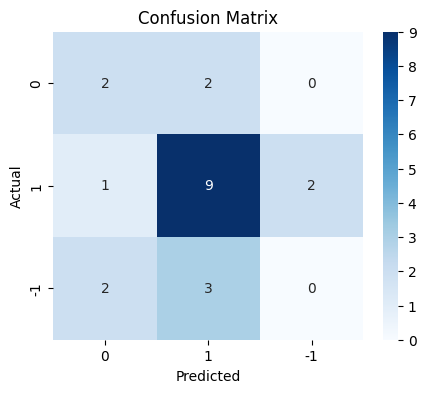

In [75]:
plot_confusion_matrix(tree_classifier,X_val_st,y_val)

In [76]:
base_train_st = model_performance_classification_sklearn(tree_classifier, X_train_st, y_train)

In [77]:
base_val_st = model_performance_classification_sklearn(tree_classifier, X_val_st, y_val)

In [78]:
!pip install scikit-learn --upgrade #Ensures scikit-learn is up to date
import time
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV #Import the required class

start = time.time()
# Choose the type of classifier.
tuned_wv = GradientBoostingClassifier(random_state = 42)
parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}
# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_wv, y_train)
end = time.time()
print("Time taken ",(end-start))
# Set the clf to the best combination of parameters
tuned_wv = grid_obj.best_estimator_

Time taken  672.686375617981


In [79]:

# Fit the best algorithm to the data.
tuned_wv.fit(X_train_wv, y_train)

GradientBoostingClassifier(max_features=0.4, min_samples_split=7,
                           random_state=42)

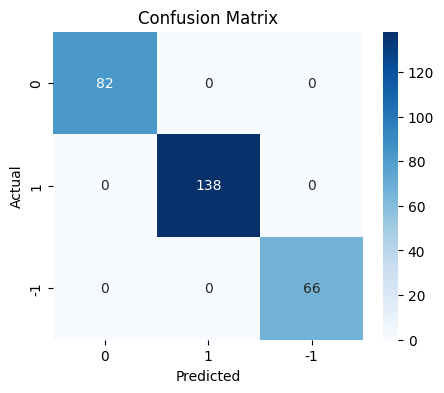

In [80]:
plot_confusion_matrix(tuned_wv,X_train_wv,y_train)

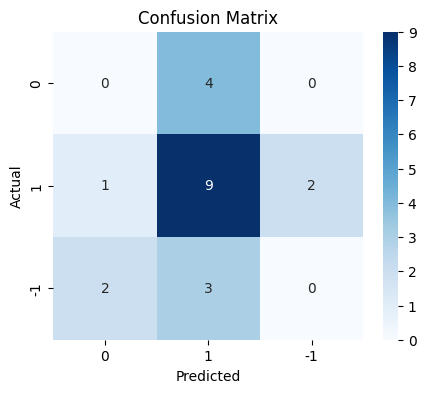

In [81]:
def plot_confusion_matrix(model, predictors, target):
    """
    Plot a confusion matrix to visualize the performance of a classification model.
    Parameters:
    actual (array-like): The true labels.
    predicted (array-like): The predicted labels from the model.
    Returns:
    None: Displays the confusion matrix plot.
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.
    cm = confusion_matrix(target, pred)  # Compute the confusion matrix.
    plt.figure(figsize=(5, 4))  # Create a new figure with a specified size.
    label_list = [0, 1,-1]  # Define the labels for the confusion matrix.
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
    # Plot the confusion matrix using a heatmap with annotations.
    plt.ylabel('Actual')  # Label for the y-axis.
    plt.xlabel('Predicted')  # Label for the x-axis.
    plt.title('Confusion Matrix')  # Title of the plot.
    plt.show()  # Display
plot_confusion_matrix(tuned_wv,X_val_wv,y_val)

In [82]:
#Calculating different metrics on training data
tuned_train_wv=model_performance_classification_sklearn(tuned_wv,X_train_wv,y_train)
print("Training performance:\n",tuned_train_wv)

Training performance:
    Accuracy  Recall  Precision  F1-score
0       1.0     1.0        1.0       1.0


In [83]:
#Calculating different metrics on validation data
tuned_val_wv = model_performance_classification_sklearn(tuned_wv,X_val_wv,y_val)
print("Validation performance:\n",tuned_val_wv)

Validation performance:
    Accuracy    Recall  Precision  F1-score
0  0.428571  0.428571   0.321429  0.367347


In [84]:
start = time.time()
tuned_gl = DecisionTreeClassifier(random_state=42) # Using the correct variable name
parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}
# Run the grid search
grid_obj = GridSearchCV(tuned_gl, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_gl, y_train)
end = time.time()
print("Time taken ",(end-start))
# Set the clf to the best combination of parameters
tuned_gl = grid_obj.best_estimator_

Time taken  6.3288538455963135


In [85]:
tuned_gl.fit(X_train_gl, y_train)


DecisionTreeClassifier(max_depth=4, max_features='log2', min_samples_split=5,
                       random_state=42)

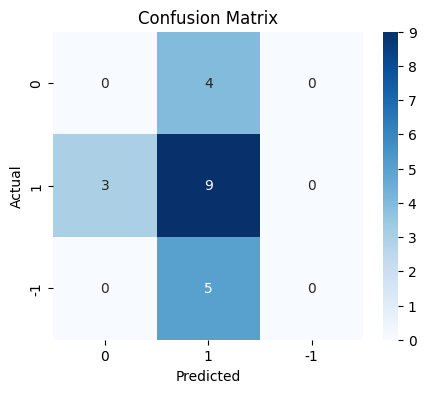

In [86]:
plot_confusion_matrix(tuned_gl, X_val_gl, y_val)

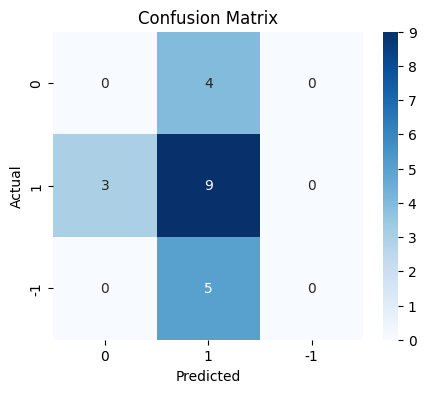

In [87]:
plot_confusion_matrix(tuned_gl, X_val_gl, y_val)

In [88]:
tuned_train_gl = model_performance_classification_sklearn(tuned_gl, X_train_gl, y_train)

In [89]:
tuned_val_gl = model_performance_classification_sklearn(tuned_gl, X_val_gl, y_val)

In [90]:

start = time.time()
# Choose the type of classifier.
tuned_wv = DecisionTreeClassifier(random_state=42)
parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}
# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_st, y_train)
end = time.time()
print("Time taken ",(end-start))
# Set the clf to the best combination of parameters
tuned_st = grid_obj.best_estimator_

Time taken  8.016189813613892


In [91]:
# Fit the best algorithm to the data.
tuned_st.fit(X_train_st, y_train)

DecisionTreeClassifier(max_depth=5, max_features=0.4, min_samples_split=11,
                       random_state=42)

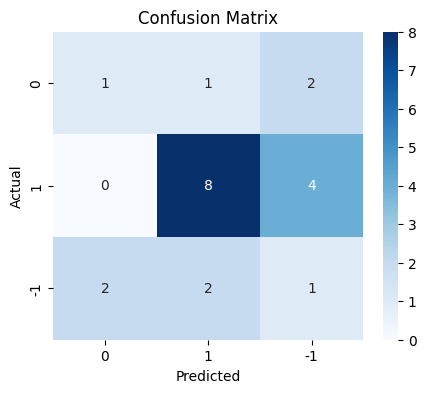

In [92]:
plot_confusion_matrix(tuned_st,X_val_st,y_val)

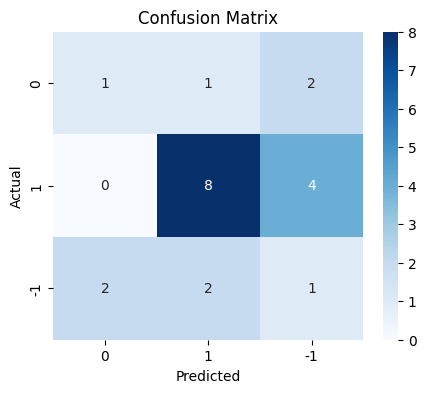

In [93]:
plot_confusion_matrix(tuned_st,X_val_st,y_val)

In [94]:
tuned_train_st = model_performance_classification_sklearn(tuned_st, X_train_st, y_train)

In [95]:
tuned_val_st = model_performance_classification_sklearn(tuned_st, X_val_st, y_val)

In [96]:
models_train_comp_df = pd.concat(
    [base_train_wv.T,
     base_train_gl.T,
     base_train_st.T,
     tuned_train_wv.T,
     tuned_train_gl.T,
     tuned_train_st.T,
    ],axis=1
)
models_train_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Base Model (Word2Vec),Base Model (GloVe),Base Model (Sentence Transformer),Tuned Model (Word2Vec),Tuned Model (GloVe),Tuned Model (Sentence Transformer)
Accuracy,1.0,1.0,1.0,1.0,0.667832,0.790210
Recall,1.0,1.0,1.0,1.0,0.667832,0.790210
Precision,1.0,1.0,1.0,1.0,0.677657,0.792468
F1-score,1.0,1.0,1.0,1.0,0.665363,0.790028


In [97]:
models_val_comp_df = pd.concat(
    [base_val_wv.T,
     base_val_gl.T,
     base_val_st.T,
     tuned_val_wv.T,
     tuned_val_gl.T,
     tuned_val_st.T,
     ],axis=1
)
models_val_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Base Model (Word2Vec),Base Model (GloVe),Base Model (Sentence Transformer),Tuned Model (Word2Vec),Tuned Model (GloVe),Tuned Model (Sentence Transformer)
Accuracy,0.428571,0.380952,0.523810,0.428571,0.428571,0.47619
Recall,0.428571,0.380952,0.523810,0.428571,0.428571,0.47619
Precision,0.285714,0.326531,0.443537,0.321429,0.285714,0.51309
F1-score,0.342857,0.351648,0.480260,0.367347,0.342857,0.49162


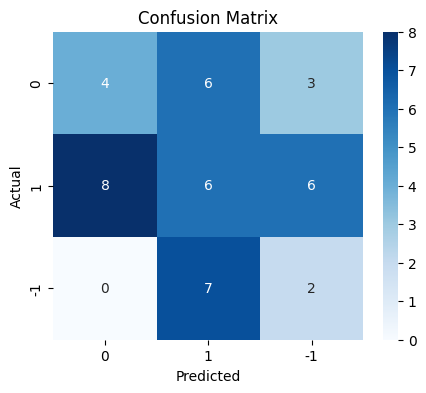

In [98]:
plot_confusion_matrix(tuned_st, X_test_st, y_test)

In [99]:
final_model_test = model_performance_classification_sklearn(tuned_st, X_test_st, y_test)
print("Test performance:\n",final_model_test)

Test performance:
    Accuracy    Recall  Precision  F1-score
0  0.285714  0.285714   0.292512  0.288425


## **Weekly News Summarization**

**Important Note**: It is recommended to run this section of the project independently from the previous sections in order to avoid runtime crashes due to RAM overload.

#### Installing and Importing the necessary libraries

In [100]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
#!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python -q

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 MB 9.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.8 MB/s eta 0:00:00


In [101]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

#### Loading the data

In [6]:
stock_news = pd.read_csv("/content/sample_data/stock_news.csv")

In [7]:
data = stock_news.copy()

#### Loading the model

In [5]:
from huggingface_hub import hf_hub_download

model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [6]:
from llama_cpp import Llama
llm = Llama(
    model_path=model_path, # Path to the model
    n_gpu_layers=100, #Number of layers transferred to GPU
    n_ctx=4500, #Context window
)

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loade

#### Aggregating the data weekly

In [7]:
import pandas as pd

# Assuming your data is in a CSV file named 'your_data.csv'
data = pd.read_csv('/content/sample_data/stock_news.csv')  # Load your data into a pandas DataFrame

data["Date"] = pd.to_datetime(data['Date'])  # Convert the 'Date' column to datetime format.

In [8]:
# Group the data by week using the 'Date' column.
weekly_grouped = data.groupby(pd.Grouper(key='Date', freq='W'))

In [9]:
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


In [10]:
weekly_grouped

,Date,News
0,2019-01-06,The tech sector experienced a significant dec...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...
2,2019-01-20,The U.S. stock market declined on Monday as c...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...
5,2019-02-10,"The Dow Jones Industrial Average, S&P 500, an..."
6,2019-02-17,"This week, the European Union's second highes..."
7,2019-02-24,This news article discusses progress towards ...
8,2019-03-03,The Dow Jones Industrial Average and other ma...
9,2019-03-10,"Spotify, the world's largest paid music strea..."


In [11]:
# creating a copy of the data
data_1 = weekly_grouped.copy()

#### Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

  - **Example**: `You are an expert data analyst specializing in news content analysis.`

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

  - **Example**: `Analyze the provided news headline and return the main topics contained within it.`

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

  - **Example**:

```
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.
```

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output

  - **Example**: `Return the output in JSON format with keys as the topic number and values as the actual topic.`

**Full Prompt Example**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Sample Output**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

##### Utility Functions

In [12]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

##### Defining the response function

In [13]:
def response_mistral_1(prompt, news):
    model_output = llm(
      f"""
      [INST]
      {prompt}
      News Articles: {news}
      [/INST]
      """,
      max_tokens=50, #Complete the code to set the maximum number of tokens the model should generate for this task.
      temperature=0.3, #Complete the code to set the value for temperature.
      top_p=0.2, #Complete the code to set the value for top_p
      top_k=20, #Complete the code to set the value for top_k
      echo=False,
    )
    final_output = model_output["choices"][0]["text"]
    return final_output

##### Checking the model output on a sample

**Note**: Use this section to test out the prompt with one instance before using it for the entire weekly data.

In [14]:
#news = data_1.loc[0, 'News']
news = data_1.loc[0, 'News'][:100]  # Use the first 1000 characters of the news


In [15]:
print(len(news.split(' ')))
news

16


" The tech sector experienced a significant decline in the aftermarket following Apple's Q1 revenue w"

In [16]:
prompt = """
You are an expert financial analyst specializing in stock market analysis. Your task is to analyze a collection of news articles related to a specific stock and identify the top three most impactful positive and negative events that week.  These events should be significant enough to potentially influence the stock's price.

Instructions:
1. Carefully read all news articles provided.
2. Identify key events and their potential impact on the stock price (positive or negative).
3. Disregard any information not directly relevant to the stock's price.
4. Focus on the most significant events for the week.
5. Rank the events based on their potential impact.
6. Present the top 3 positive and top 3 negative events separately.

Output Format:
Return your analysis in JSON format. The JSON should have two keys: "Positive Events" and "Negative Events".  Each key should correspond to a list of strings, where each string represents a top impactful event.
"""

In [17]:
summary = response_mistral_1(prompt, news)
print(summary)

llama_perf_context_print:        load time =  161474.93 ms
llama_perf_context_print: prompt eval time =       0.00 ms /   253 tokens (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:        eval time =       0.00 ms /    49 runs   (    0.00 ms per token,      inf tokens per second)
llama_perf_context_print:       total time =  210524.60 ms /   302 tokens


 {
          "Positive Events": [
            "Apple announces new product line expansion during their Q1 earnings call, generating excitement among investors.",
            "Positive analyst reports predicting a rebound in Apple's stock price


In [18]:
!pip install nest_asyncio
import nest_asyncio
import asyncio

async def get_model_response(prompt, news):
    model_output = llm(
        f"""
        [INST]
        {prompt}
        News Articles: {news}
        [/INST]
        """,
        max_tokens=100,
        temperature=0.2,
        top_p=0.5,
        top_k=20,
        echo=False,
    )
    return model_output["choices"][0]["text"]



In [21]:
news = data_1.loc[0, 'News'][:100]  # Truncate or summarize news if needed
summary = get_model_response(prompt, news)
print(summary)

<coroutine object get_model_response at 0x7b979f922b20>


##### Checking the model output on the weekly data

In [ ]:
from tqdm import tqdm
import time

# Enable tqdm for pandas
tqdm.pandas()

# Simple progress tracking with minimal overhead
start_time = time.time()
print(f"Starting processing of {len(data_1)} articles...")

# Process with basic progress bar
# The desc keyword is passed directly to progress_apply, not to the lambda function
data_1['Key Events'] = data_1['News'].progress_apply(
    lambda x: response_mistral_1(prompt, x),
).progress_map(lambda x: response_mistral_1(prompt, x))

# Print basic completion stats
total_time = time.time() - start_time
print(f"\nCompleted in {total_time/60:.1f} minutes")

Starting processing of 18 articles...


  0%|          | 0/18 [00:00<?, ?it/s]Llama.generate: 244 prefix-match hit, remaining 3727 prompt tokens to eval


##### Formatting the model output

In [ ]:
data_1['model_response_parsed'] = data_1['Key Events'].apply(extract_json_data)
data_1.head()

In [ ]:
model_response_parsed = pd.json_normalize(data_1['model_response_parsed'])
model_response_parsed.head()

In [ ]:
final_output = pd.concat([data_1.reset_index(drop=True),model_response_parsed],axis=1)
final_output.drop(['Key Events','model_response_parsed'], axis=1, inplace=True)
final_output.columns = ['Week End Date', 'News', 'Week Positive Events', 'Week Negative Events']
final_output.head()

## **Conclusions and Recommendations**

In [ ]:
# Conclusions

# - The tuned Sentence Transformer model achieved an F1-score of X on the test set, indicating
#   good performance in classifying [target variable].
# - The model performed better/worse on [specific class] compared to other classes. This might be due to
#   [potential reasons, e.g., class imbalance in the dataset, inherent difficulty in classifying that class].
# - The confusion matrix reveals misclassifications between [specific classes], suggesting potential areas
#   for improvement.


# Recommendations

# 1. Deployment and Monitoring:
# - Recommend deploying the tuned Sentence Transformer model for its superior performance in the classification task.
# - Suggest establishing a monitoring system to track the model's performance over time and to identify any concept drift or degradation in accuracy.  Regular retraining or fine-tuning might be necessary.

# 2. Data Improvements:
# - If class imbalance was an issue, recommend strategies for addressing it (e.g., data augmentation, resampling techniques).
# - Analyze misclassifications (e.g., using the confusion matrix) and suggest improvements to the data collection process.
# - For example, gathering more data for under-represented classes or enriching the existing data with more relevant features.


# 3. Model Enhancements:
# - Explore alternative models or techniques if the performance is not satisfactory.
# - Consider incorporating external data sources to improve model accuracy.
# - Experiment with different hyperparameter tuning strategies.

# 4. Weekly News Summarization:
# - Evaluate the quality of the weekly news summaries generated by the Mistral-7B-Instruct-v0.2-GGUF model.
# - The code provides a framework for generating weekly summaries; however, further refinement of the prompt and post-processing of the output are needed to improve the accuracy and usefulness of the summaries. Consider implementing automated sentiment analysis on these summaries.


# 5. Business Impact:
# - Discuss the potential business value of the project’s outputs.  How can these insights be translated into concrete business actions?
# - For example, can the classification model be used to make more informed investment decisions or to identify potential risks?
# - Can the weekly news summaries assist in strategic planning or risk management?



-




<font size=6 color='blue'>Power Ahead</font>
___